In [94]:
#The concept is if CNN is used for images then why not use in GAN also may we get better reults

In [95]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist

In [96]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [97]:
import matplotlib.pyplot as plt

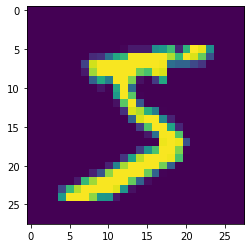

In [98]:
plt.imshow(X_train[0])

Reshape and Rescaling
Generator will use tanh activation function for the last layers so we have to reshape X_train between -1,1

In [99]:
X_train = X_train/255

In [100]:
X_train = X_train.reshape(-1,28,28,1) * 2. - 1.

In [101]:
X_train.min()

-1.0

In [102]:
X_train.max()

1.0

In [103]:
X_train.shape

(60000, 28, 28, 1)

In [104]:
only_zeros = X_train[y_train==0]

In [105]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape,Flatten,Dropout,LeakyReLU,BatchNormalization,Conv2D,Conv2DTranspose
from tensorflow.keras.models import Sequential

In [106]:
coding_size=100

In [107]:
coding_size=100
generator = Sequential()
generator.add(Dense(7*7*128,input_shape=[coding_size]))
generator.add(Reshape([7,7,128]))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(64, kernel_size=5, strides=2, padding='same',activation='relu'))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(1, kernel_size=5, strides=2, padding='same',activation='tanh'))

In [108]:

discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, padding='same',activation=LeakyReLU(0.3),input_shape=[28,28,1]))
discriminator.add(Dropout(0.5))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding='same',activation=LeakyReLU(0.3)))
discriminator.add(Dropout(0.5))
discriminator.add(Flatten())
discriminator.add(Dense(1,activation='sigmoid'))

In [109]:
GAN = Sequential([generator,discriminator])

In [110]:
discriminator.compile(loss='binary_crossentropy',optimizer='adam')

In [111]:
discriminator.trainable = False

In [112]:
GAN.compile(loss='binary_crossentropy',optimizer='adam')

In [113]:
batch_size=32

In [114]:
my_data = only_zeros

In [115]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [116]:
dataset = dataset.batch(batch_size,drop_remainder = True).prefetch(1)

In [117]:
epochs = 20

In [118]:
GAN.layers[1].summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        1664      
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 dropout_7 (Dropout)         (None, 7, 7, 128)         0         
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 dense_8 (Dense)             (None, 1)                 6273      
                                                                 
Total params: 212,865
Trainable params: 0
Non-trainab

In [119]:
GAN.layers[0].summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 6272)              633472    
                                                                 
 reshape_4 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 batch_normalization_6 (Batc  (None, 7, 7, 128)        512       
 hNormalization)                                                 
                                                                 
 conv2d_transpose_6 (Conv2DT  (None, 14, 14, 64)       204864    
 ranspose)                                                       
                                                                 
 batch_normalization_7 (Batc  (None, 14, 14, 64)       256       
 hNormalization)                                                 
                                                     

In [120]:
generator, discriminator = GAN.layers
for epoch in range(epochs):
    print(f"Currently on Epoch {epoch+1}")
    i = 0
    for X_batch in dataset:
        i=i+1
        if i%100 == 0:
            print(f"\tCurrently on batch number {i} of {len(my_data)//batch_size}")
        # Create Noise
        noise = tf.random.normal(shape=[batch_size, coding_size])
        
        
        gen_images = generator(noise)
        
        # Concatenate Generated Images against the Real Ones
        # TO use tf.concat, the data types must match!
        X_fake_vs_real = tf.concat([gen_images, tf.dtypes.cast(X_batch,tf.float32)], axis=0)
        
        # Targets set to zero for fake images and 1 for real images
        y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
        
        discriminator.trainable = True
        
        # Train the discriminator on this batch
        discriminator.train_on_batch(X_fake_vs_real, y1)
        
        # Create some noise
        noise = tf.random.normal(shape=[batch_size, coding_size])
        
        # We want discriminator to belive that fake images are real
        y2 = tf.constant([[1.]] * batch_size)
        discriminator.trainable = False
        
        GAN.train_on_batch(noise, y2)
        
print("TRAINING COMPLETE")            

Currently on Epoch 1
	Currently on batch number 100 of 185
Currently on Epoch 2
	Currently on batch number 100 of 185
Currently on Epoch 3
	Currently on batch number 100 of 185
Currently on Epoch 4
	Currently on batch number 100 of 185
Currently on Epoch 5
	Currently on batch number 100 of 185
Currently on Epoch 6
	Currently on batch number 100 of 185
Currently on Epoch 7
	Currently on batch number 100 of 185
Currently on Epoch 8
	Currently on batch number 100 of 185
Currently on Epoch 9
	Currently on batch number 100 of 185
Currently on Epoch 10
	Currently on batch number 100 of 185
Currently on Epoch 11
	Currently on batch number 100 of 185
Currently on Epoch 12
	Currently on batch number 100 of 185
Currently on Epoch 13
	Currently on batch number 100 of 185
Currently on Epoch 14
	Currently on batch number 100 of 185
Currently on Epoch 15
	Currently on batch number 100 of 185
Currently on Epoch 16
	Currently on batch number 100 of 185
Currently on Epoch 17
	Currently on batch number 

In [121]:
noise = tf.random.normal(shape=[10,coding_size])

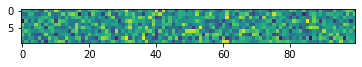

In [122]:
plt.imshow(noise)

In [123]:
images = generator(noise)

In [124]:
single_image = images[0]

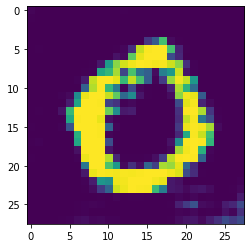

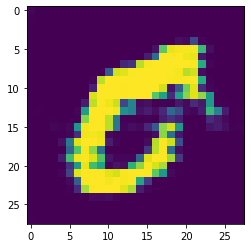

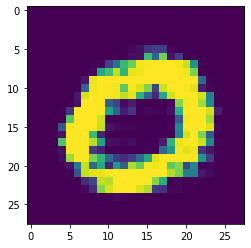

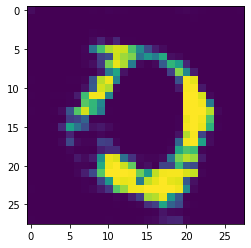

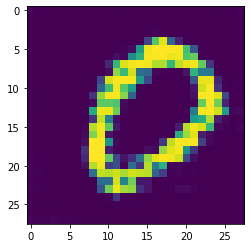

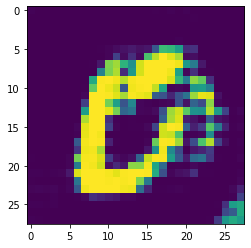

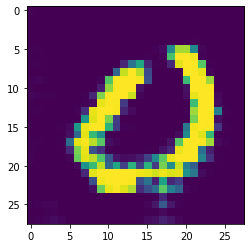

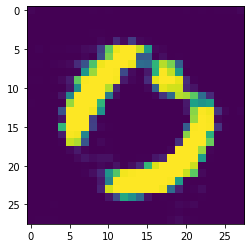

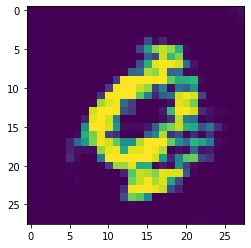

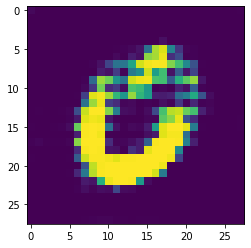

In [125]:
for image in images:
  plt.imshow(image.numpy().reshape(28,28))
  plt.show()

TypeError: ignored

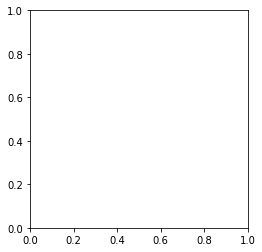

In [126]:
plt.imshow(images[0])